In [1]:
from __future__ import print_function
import glob
import numpy as np
import pylab as pl
import sys
import pickle as pkl
from gatspy.periodic import LombScargleFast



import json
s = json.load( open("fbb_matplotlibrc.json") )
pl.rcParams.update(s)



%pylab inline

REREAD=False
#REREAD=True
DETREND=0
nmax=-1

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib-1.4.3-py2.7-linux-x86_64.egg/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
nrow = 2048
ncol = 2448
nband = 3

flist=glob.glob("/home/fb55/UIdata/test_119hz_4hz_12ms/*113841*raw")
flist119=np.array(flist)[np.argsort(flist)]
print(len(flist))
#print flistgood

flist2=glob.glob("/home/fb55/UIdata/test_120hz_4hz_12ms/*raw")
flist120=np.array(flist2)[np.argsort(flist2)]
print(len(flist2))
#print flistgood



555
1000555
1000



In [ ]:
for i in range(100,200):
    fig=pl.figure()
    ax1=fig.add_subplot(121)
    ax1.set_axis_off()
    ax1.set_title("119Hz sampling",fontsize=18)
    ax1.imshow(np.fromfile(flist119[i],dtype=np.uint8).reshape(nrow,ncol,nband))
    ax2=fig.add_subplot(122)
    ax2.set_title("120Hz sampling",fontsize=18)
    ax2.set_axis_off()
    ax2.imshow(np.fromfile(flist120[i],dtype=np.uint8).reshape(nrow,ncol,nband))
    pl.savefig("figure_%02d.png"%i)

In [13]:
if REREAD:
    a=np.zeros(len(flist119[:nmax]))
    print (len(a))
    for i,f in enumerate(flist119[:nmax]):
        a[i]=sum(np.fromfile(f,dtype=np.uint8).reshape(nrow,ncol,nband)[1000:13500,1000:1350])
    print (a.mean())
    print (a.std())
    pkl.dump(a,open("test_shutter_119hz_4hz_12ms.pkl","wb"))

else:
    a=pkl.load(open("test_shutter_119hz_4hz_12ms.pkl",'rb'))
a=a[100:200]
flux0=(a-a.mean())/a.std()
flux=flux0.copy()

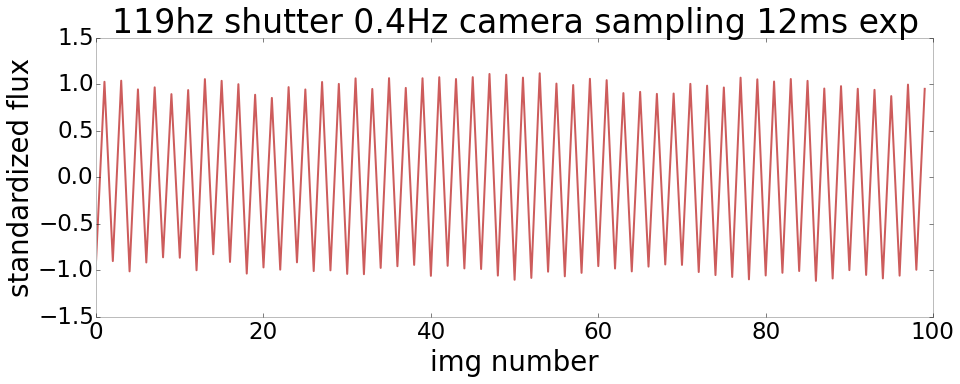

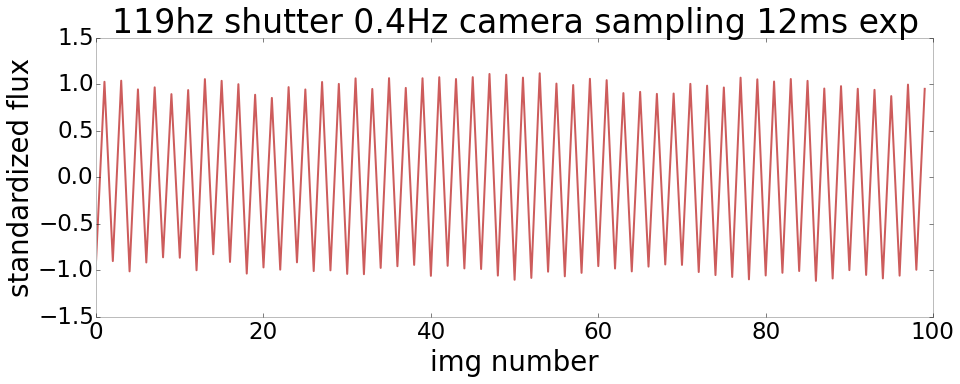

In [15]:
font = {'size'   : 23}
pl.rc('font', **font)

pl.figure(figsize=(15,5))
pl.plot(flux, color="IndianRed")
pl.xlabel("img number")
pl.ylabel("standardized flux")
pl.title("119hz shutter 0.4Hz camera sampling 12ms exp")


In [16]:
REREAD=0
if REREAD:
    b=np.zeros(len(flist120[:nmax]))
    print (len(b))
    for i,f in enumerate(flist120[:nmax]):
        b[i]=sum(np.fromfile(f,dtype=np.uint8).reshape(nrow,ncol,nband)[1000:13500,1000:1350])
    print (b.mean())
    print (b.std())
    pkl.dump(b,open("test_shutter_120hz_4hz_12ms.pkl","wb"))
    
    
else:
    b=pkl.load(open("test_shutter_120hz_4hz_12ms.pkl","rb"))
    b=b[0:100]

100
100


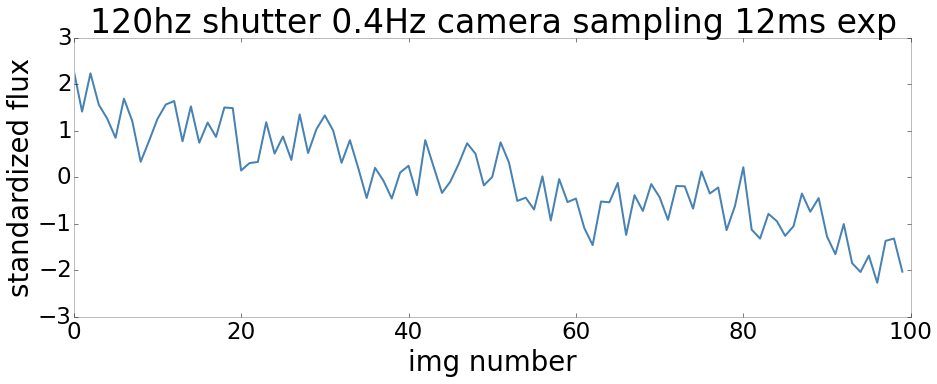

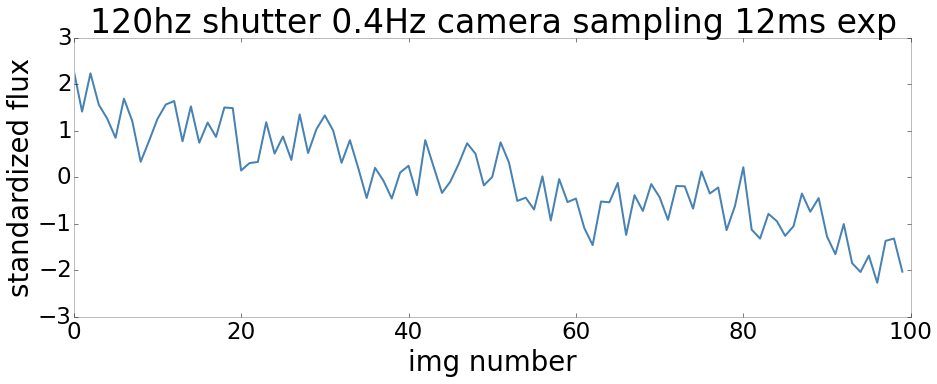

In [18]:
print( len(b))
flux2=(b-b.mean())/b.std()
pl.figure(figsize=(15,5))
pl.plot(flux2)
pl.xlabel("img number")
pl.ylabel("standardized flux")
pl.title("120hz shutter 0.4Hz camera sampling 12ms exp")


[ -3.41672175e+04   5.56965709e+07]
[ -3.41672175e+04   5.56965709e+07]


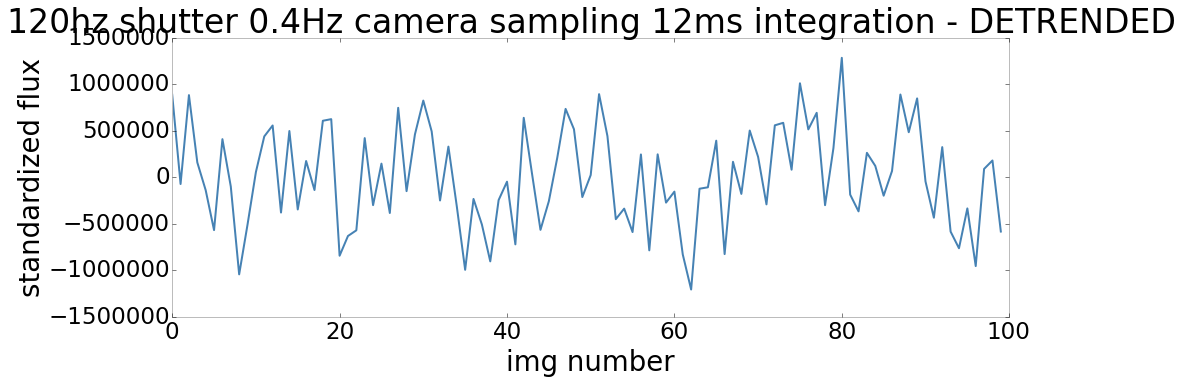

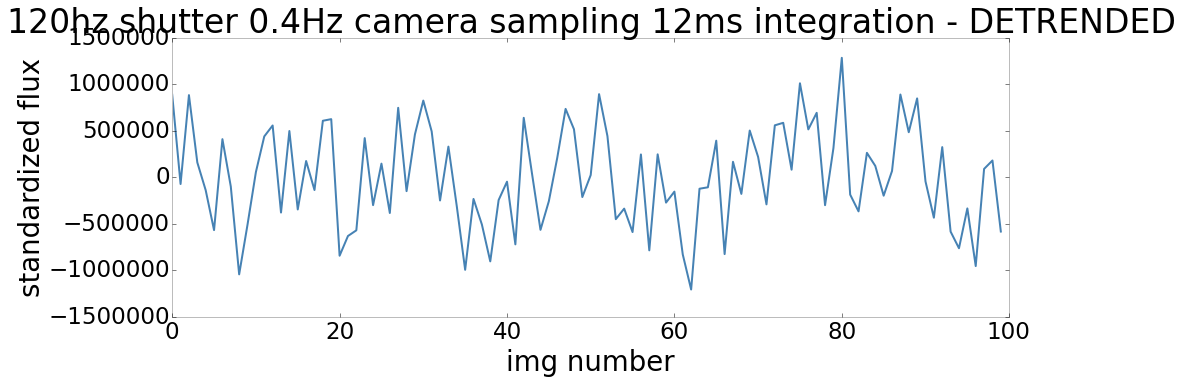

In [19]:
DETREND=True
if DETREND:
    c=b.copy()
    res=np.polyfit(np.arange(len(c)),c,1)
    print (res)
    c-=(np.arange(len(c))*res[0]+res[1])
    flux3=(c)#-c.mean())/c.std()
    pl.figure(figsize=(15,5))
    pl.plot(flux3)
    pl.xlabel("img number")
    pl.ylabel("standardized flux")
    pl.title("120hz shutter 0.4Hz camera sampling 12ms integration - DETRENDED")

# ##PERIODOGRAMS and FITS

# 120 vs 119 : expected 1 Hz

In [20]:
from gatspy import  periodic
model119 = periodic.LombScargleFast(fit_period=True)
model119.optimizer.period_range = (0.8, 3.0)
model119.fit(np.arange(len(a))/4.0*10.0,flux)
periods119, power119 = model119.periodogram_auto()
print ("\n\n\nbest period", model119.best_period, "119hz shutter 0.4Hz camera sampling 12ms integration\n\n")
model119_sh = periodic.LombScargleFast(fit_period=True)
model119_sh.optimizer.period_range = (0.8, 3.0)
model119_sh.fit(np.arange(len(a[:200]))/4.0*10.0,flux[:200])
periods119_sh, power119_sh = model119_sh.periodogram_auto()
print ("\n\n\nbest period for first 200 datapoints", model119_sh.best_period, "119hz shutter 0.4Hz camera sampling 12ms integration")

Finding optimal frequency:
 - Estimated peak width = 0.0254
 - Using 5 steps per peak; omega_step = 0.00508
 - User-specified period range:  0.8 to 3
 - Computing periods at 1136 steps
Finding optimal frequency:
 - Estimated peak width = 0.0254
 - Using 5 steps per peak; omega_step = 0.00508
 - User-specified period range:  0.8 to 3
 - Computing periods at 1136 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps



best period 1.66644223 119hz shutter 0.4Hz camera sampling 12ms integration


Finding optimal frequency:
 - Estimated peak width = 0.0254
 - Using 5 steps per peak; omega_step = 0.00508
 - User-specified period range:  0.8 to 3
 - Computing periods at 1136 steps



best period 1.66644223 119hz shutter 0.4Hz camera sampling 12ms integration


Finding optimal frequency:
 - Estimated peak width = 0.0254
 - Using 5 steps per peak; omega_step = 0.00508
 - User-specified period range:  0.8 to 3

#simulated signal:

247.5 100
247.5 100


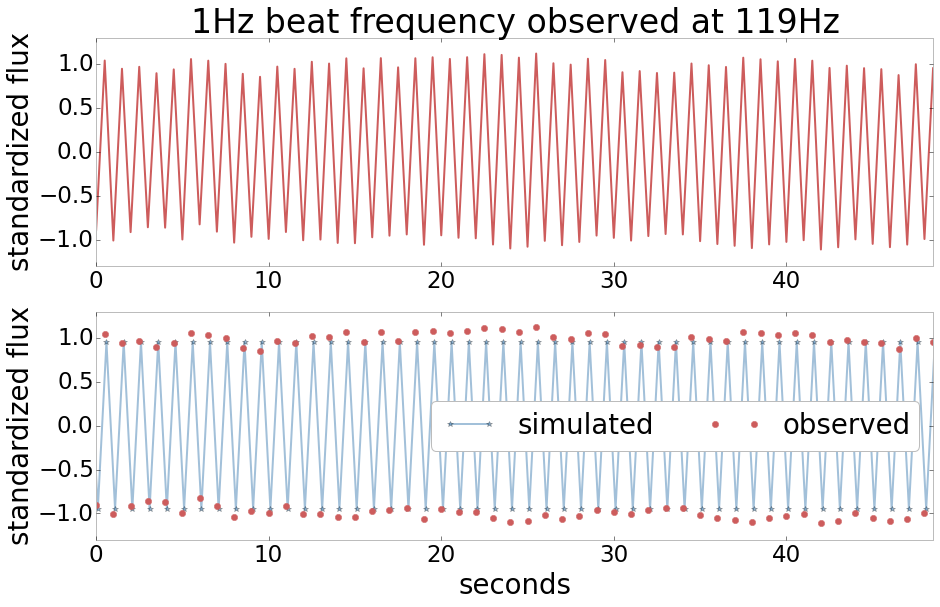

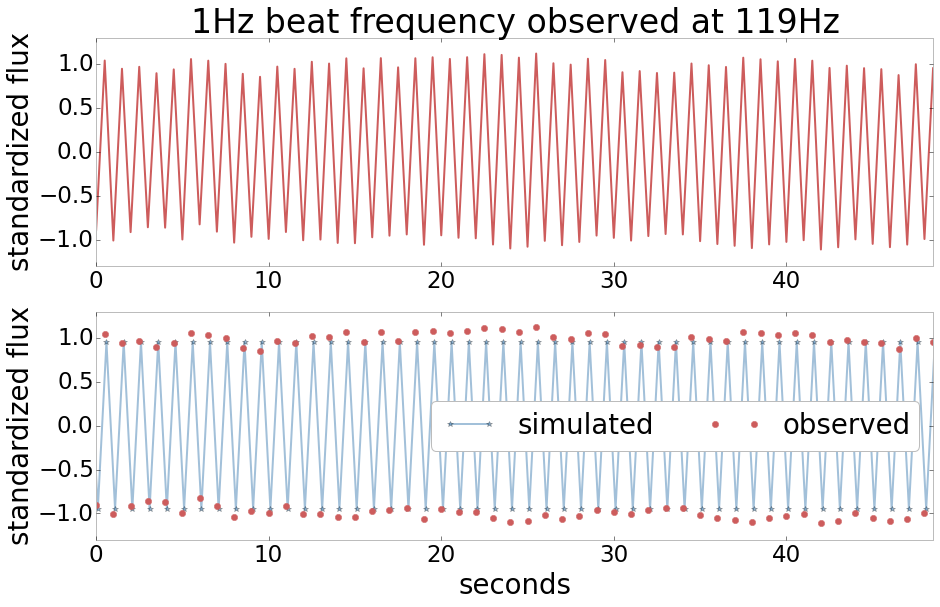

In [53]:
runtime=np.arange(len(a))/4.0*10.0 #4 Hz, but pick one every 10
print (max(runtime),len(a))

freq=1
fig=pl.figure(figsize=(15,9))
ax1=fig.add_subplot(211)
pl.title('1Hz beat frequency observed at 119Hz')
ax1.plot(0.2*runtime-1,flux, color='IndianRed')
ax1.set_xlim(0,48.5)
ax1.set_ylim(-1.3,1.3)

ax1.set_ylabel("standardized flux")

phase=np.pi*0.4
wave = lambda t,phi,freq,amp: np.sin(2.*freq*np.pi*t+phi)*amp
t=np.linspace(0,max(runtime),350000)

ax2=fig.add_subplot(212)

syntheticwave=wave(np.arange(0,max(runtime),2.5),phase,freq,1)
ax2.plot(0.2*(np.arange(0,max(runtime),2.5)-2),syntheticwave, '-*',color='SteelBlue', alpha=0.5, label="simulated")
ax2.plot(0.2*runtime-1,flux,'o',markeredgecolor='IndianRed',markerfacecolor='IndianRed', label="observed", lw=3)
ax2.legend(ncol=2,loc=7)
ax2.set_xlabel("seconds")
ax2.set_ylabel("standardized flux")
ax2.set_xlim(0,48.5)
ax2.set_ylim(-1.3,1.3)
pl.savefig('observed_119Hz.png')

In [ ]:
runtime=np.arange(len(a))/4.0*10.0 #4 Hz, but pick one every 10
print (max(runtime),len(a))
pl.figure(figsize=(15,5))
pl.title('observed signal 119Hz')
pl.plot(runtime,flux, color='IndianRed', lw=1)
pl.xlabel("seconds")
pl.ylabel("almost normalized flux")
freq=1
phase=np.pi*0.4
wave = lambda t,phi,freq,amp: np.sin(2.*freq*np.pi*t+phi)*amp
t=np.linspace(0,max(runtime),350000)
pl.figure(figsize=(15,5))
pl.title('1Hz signal + 2.5e-4 Hz (67 min) 0.4Hz')

syntheticwave=wave(np.arange(0,max(runtime),2.5),phase,freq,1)
pl.plot(np.arange(0,max(runtime),2.5),syntheticwave, '-*',color='SteelBlue', alpha=0.5, label="simulated 1Hz", lw=1)
pl.plot(np.arange(0,max(runtime),2.5),wave(np.arange(0,max(runtime),2.5),phase,freq,1)*wave(np.arange(0,max(runtime),2.5),2.6*np.pi/3,0.00025,1.2), '-*',color='SteelBlue', alpha=0.5, label="simulated 2.5e-4 Hz")
pl.plot(runtime+2.5/2.0,flux,'o',markeredgecolor='IndianRed',markerfacecolor='None', label="observed", lw=1)
pl.legend(fontsize=20, ncol=3, loc=3)
pl.xlabel("seconds")
pl.ylabel("standardized flux")


In [ ]:
from numpy import sin, linspace, pi
from pylab import plot, show, title, xlabel, ylabel, subplot
from scipy import fft, arange

def plotSpectrum(y,Fs):
 """
 Plots a Single-Sided Amplitude Spectrum of y(t) sampled at Fs rate
 """
 n = len(y) # length of the signal
 k = arange(n)
 T = n/Fs
 frq = k/T # two sides frequency range
 frq = frq[range(n/2)] # one side frequency range

 Y = fft(y)/n # fft computing and normalization
 Y = Y[range(n/2)]
 
 plot(frq,abs(Y),'r') # plotting the spectrum
 xlabel('Freq (Hz)',fontsize=20)
 ylabel('|Y(freq)|',fontsize=20)
 return frq

pl.figure(figsize=(15,15))    
frq=plotSpectrum(syntheticwave,0.4)
print ('available frequencies: %f %f'%(frq[1],frq[-1]))

In [ ]:
fig=pl.figure(figsize(40,5))
ax=fig.add_subplot(121)

ax.plot(periods119, power119,lw=1,color='Red', label="119hz shutter 0.4Hz camera sampling 12ms exp")
ax.plot(periods119, power119,'.',color='IndianRed')
ax.plot(periods119_sh, power119_sh,lw=1,color='IndianRed', label="119hz shutter 0.4Hz camera sampling 12ms exp - 200 pts")
ax.plot(periods119_sh, power119_sh,'.',color='IndianRed')

ax.set_xscale('log')
ax.set_title("N images: %d, duration %g min"%(len(a),len(a)/4.0*10/60))
ax.set_xlabel("time (seconds)")
pl.legend(fontsize=20)
ax.set_ylabel("power")
print ("\n\n\n best period",model119.best_period, "119hz shutter 0.4Hz camera sampling 12ms exp - detrended")

In [ ]:
fig=pl.figure(figsize(45,5))
ax=fig.add_subplot(121)

ax.plot(periods119, power119,lw=1,color='IndianRed', label="119hz shutter 0.4Hz camera sampling 12ms exp")
ax.plot(periods119, power119,'.',color='IndianRed')

ax.plot(periods119_sh, power119_sh,lw=1,color='Red', label="119hz shutter 0.4Hz camera sampling 12ms exp - 200 pts")
ax.plot(periods119_sh, power119_sh, '.',color='Red')
ax.set_xscale('log')

ax.set_title("N images: %d, duration %g min"%(len(a),len(a)/4.0*10/60))
ax.set_xlabel("time (seconds)")
ax.set_xticks([1,5,10])
ax.set_xticklabels(["1","5","10"])
pl.legend(fontsize=20)
pl.xlim(4.5,6)
ax.set_ylabel("power")
print ("\n\n\n best period",model119.best_period, "119hz shutter 0.4Hz camera sampling 12ms exp - detrended")

#expected period: 1Hz sampled at 0.4Hz: 5 sec 

#Nyquist frequency: 0.2Hz: Nyquist period: 5 sec

# 120 vs 120

In [ ]:
runtime=np.arange(len(b))/4.0*10.0 #4 Hz, but pick one every 10
print (max(runtime),len(b))
pl.figure(figsize=(15,5))
pl.title('observed signal 120Hz')
pl.plot(runtime,flux3, color='SteelBlue')
pl.xlabel("seconds")
pl.ylabel("almost normalized flux")

wave = lambda t,phi,freq,amp: np.sin(2.*freq*np.pi*t+phi)*amp
t=np.linspace(0,max(runtime),350000)
pl.figure(figsize=(15,5))
pl.title('3.5e-3 Hz (48 min) + 2.5e-3 Hz (67 min) 0.4Hz')

freq=0.00035
phase=2*np.pi/3
amp=2
syntheticwave=wave(np.arange(0,max(runtime),2.5),phase,freq,amp)
pl.plot(np.arange(0,max(runtime),2.5),syntheticwave, '-*',color='SteelBlue', alpha=0.5, label="simulated")
freq=0.0003
phase=2*np.pi/3
amp=2
syntheticwave=wave(np.arange(0,max(runtime),2.5),phase,freq,amp)
pl.plot(np.arange(0,max(runtime),2.5),syntheticwave, '-*',color='SteelBlue', alpha=0.5)
pl.plot(runtime+2.5/2.0,flux3,'o',markeredgecolor='SteelBlue',markerfacecolor='None', label="observed")
pl.legend()
pl.xlabel("seconds")
pl.ylabel("standardized flux")

In [ ]:
model120 = periodic.LombScargleFast(fit_period=True)
model120.optimizer.period_range = (0.8, 3.0)
model120.fit(np.arange(len(b))/4.0*10.0,flux3)
periods120, power120 = model120.periodogram_auto()
print ("\n\n\n best period",model120.best_period, "120hz shutter 0.4Hz camera sampling 12ms integration - detrended\n\n")
model120_sh = periodic.LombScargleFast(fit_period=True)
model120_sh.optimizer.period_range = (0.8, 3.0)
model120_sh.fit(np.arange(len(b[:200]))/4.0*10.0,flux3[:200])
periods120_sh, power120_sh = model120_sh.periodogram_auto()
print ("\n\n\nbest period for first 200 dpts", model120_sh.best_period, "120hz shutter 0.4Hz camera sampling 12ms integration")

In [ ]:
fig=pl.figure(figsize(30,5))
ax=fig.add_subplot(121)

ax.plot(periods120, power120,lw=1,color='SteelBlue',alpha=0.5, label="120hz shutter 0.4Hz camera sampling 12ms integration")
ax.plot(periods120, power120,'.',color='SteelBlue',alpha=0.5)
ax.set_xscale('log')
ax.set_title("N images: %d, duration %g min"%(len(b),len(b)/4.0*10/60))
ax.set_xlabel("time (seconds)")
pl.legend(fontsize=20)
ax.set_ylabel("power")

In [ ]:
fig=pl.figure(figsize(30,5))
ax=fig.add_subplot(121)

ax.plot(periods120_sh, power120_sh,lw=1,color='Blue',alpha=0.5, label='first 200')
ax.plot(periods120_sh, power120_sh,'.',color='Blue',alpha=0.5)
ax.plot(periods120, power120,lw=1,color='SteelBlue',alpha=0.5, label='all')
ax.plot(periods120, power120,'.',color='SteelBlue',alpha=0.5)
ax.set_xlim(1.5,3)
ax.set_xscale('log')

ax.set_title("N images: %d, duration %f sec"%(len(b),len(b)/4.0*10/60))
ax.set_xlabel("time (seconds)")
ax.set_ylabel("power")
ax.set_xticks([2,2.5,3])
ax.set_xticklabels(["2","2.5","3"])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
pl.xlim(2,3)
pl.legend()

# 120 vs 81: expected 39Hz

In [ ]:
runtime=np.arange(len(flux5))/4.0*10.0 #4 Hz, but pick one every 10
pl.figure(figsize=(15,5))
pl.title('observed signal 81Hz')
pl.plot(runtime,flux5, color='DarkOrange')
pl.xlabel("seconds")
pl.ylabel("almost normalized flux")
pl.xlim(0,200/0.4)


freq=39
phase=np.pi*0.1
t=np.linspace(0,max(runtime),350000)
pl.figure(figsize=(15,5))
pl.title('39Hz signal + 5e-4Hz (33 min period) amplitude 10x')
pl.plot(np.arange(0,max(runtime),2.5),wave(np.arange(0,max(runtime),2.5),phase,freq,0.5)*wave(np.arange(0,max(runtime),2.5),2.6*np.pi/3,0.0005,10), '-*',color='SteelBlue', alpha=0.5, label="simulated")
pl.plot(runtime+2.5/2.0,flux5,'o',markeredgecolor='DarkOrange',markerfacecolor='None', label="observed")
pl.legend(fontsize=20, loc=2)
pl.xlabel("seconds")
pl.ylabel("almost normalized flux")
pl.xlim(0,200/0.4)


In [ ]:
runtime=np.arange(len(d))/4.0*10.0 #4 Hz, but pick one every 10
'''
pl.figure(figsize=(15,5))
pl.title('observed signal 81Hz')
pl.plot(runtime,flux6, color='DarkOrange', lw=1)
pl.xlabel("seconds")
pl.ylabel("almost normalized flux")
'''
freq=39
phase=np.pi*0.1
t=np.linspace(0,max(runtime),350000)
pl.figure(figsize=(15,5))
pl.title('1Hz signal + 5e-4Hz (33 min) amplitude: 2.5x')
pl.plot(np.arange(0,max(runtime),2.5),wave(np.arange(0,max(runtime),2.5),phase,freq,1)*wave(np.arange(0,max(runtime),2.5),2.6*np.pi/3,0.0005,2.5), '-*',color='SteelBlue', alpha=0.5, label="simulated")
pl.plot(runtime+2.5/2.0,flux6,'o',markeredgecolor='DarkOrange',markerfacecolor='None', label="observed")
pl.legend(fontsize=20,loc=2)
pl.xlabel("seconds")
pl.ylabel("almost normalized flux")
#pl.xlim(200,300)

In [ ]:
'''
pl.figure(figsize=(15,5))
pl.title('observed signal 81Hz')
pl.plot(runtime,flux5, color='DarkOrange')
pl.xlabel("seconds")
pl.ylabel("almost normalized flux")
'''
freq=39
phase=np.pi*0.1
t=np.linspace(0,max(runtime),350000)
pl.figure(figsize=(15,5))
pl.title('1Hz signal + 2.5e-4Hz (66 min) amplitude: 3.5x')
pl.plot(np.arange(0,max(runtime),2.5),wave(np.arange(0,max(runtime),2.5),phase,freq,1)*wave(np.arange(0,max(runtime),2.5),2.8*np.pi/3,0.00025,3.5), '-*',color='SteelBlue', alpha=0.5, label="simulated")
pl.plot(runtime+2.5/2.0,flux6,'o',markeredgecolor='DarkOrange',markerfacecolor='None', label="observed")
pl.legend(fontsize=20,loc=2)
pl.xlabel("seconds")
pl.ylabel("almost normalized flux")
          

In [ ]:
model81= periodic.LombScargleFast(fit_period=True)
model81.optimizer.period_range = (0.2, 3.0)
model81.fit(np.arange(len(flux5))/4.0*10.0,flux5)
periods81, power81 = model81.periodogram_auto()
print ("\n\n\nbest period",model81.best_period, "81hz shutter 0.4Hz camera sampling 3ms integration")

model81_sh = periodic.LombScargleFast(fit_period=True)
model81_sh.optimizer.period_range = (0.8, 3.0)
model81_sh.fit(np.arange(len(b[:200]))/4.0*10.0,flux3[:200])
periods81_sh, power81_sh = model81_sh.periodogram_auto()
print ("\n\n\nbest period for first 200 dpts", model120_sh.best_period, "81hz shutter 0.4Hz camera sampling 3ms integration \n\n")

fig=pl.figure(figsize(30,5))
ax=fig.add_subplot(121)

ax.plot(periods81, power81,lw=1,color='DarkOrange',alpha=0.5,label="81hz shutter 0.4Hz camera sampling 3ms integration")
ax.plot(periods81, power81,'.',color='DarkOrange',alpha=0.5)
ax.set_xscale('log')
ax.set_title("N images: %d, duration %g min"%(len(d),len(d)/4.0*10/60))
ax.set_xlabel("time (seconds)")
ax.set_ylabel("power")
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

In [ ]:
fig=pl.figure(figsize(30,5))
ax=fig.add_subplot(121)

ax.plot(periods81_sh, power81_sh,lw=1,color='Red', label="81hz shutter 0.4Hz camera sampling 3ms exp, 200 pts")
ax.plot(periods81_sh, power81_sh,'.',color='Red')
ax.plot(periods81, power81,lw=1,color='DarkOrange', label="81hz shutter 0.4Hz camera sampling 3ms exp")
ax.plot(periods81, power81,'.',color='DarkOrange')
ax.set_xlim(3.5,5.5)
ax.set_title("N images: %d, duration %g min"%(len(d),len(d)/4.0*10/60))
ax.set_xlabel("time (seconds)")
ax.set_ylabel("power")
pl.legend(fontsize=20,loc=2)
ax.set_xticks([3.5,4,5,5.5])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


In [ ]:
'''
tsample=np.linspace(0,400,400*4/10)
pl.figure(figsize=(25,5))
pl.plot(tsample,wave(tsample,phase,freq,1), '-',color='SteelBlue', alpha=0.5)
pl.plot(tsample,wave(tsample,phase,freq,1), 'o',color='SteelBlue', alpha=0.5)
pl.plot(runtime,flux,'o',markeredgecolor='Red',markerfacecolor='None', lw=2)
pl.xlabel("seconds")
pl.ylabel("almost normalized flux")
pl.xlim(0,600)
tsample=np.linspace(600,1000,400*4/10)
pl.figure(figsize=(25,5))
pl.plot(tsample,wave(tsample,phase,freq,1), '-',color='SteelBlue', alpha=0.5)
pl.plot(tsample,wave(tsample,phase,freq,1), 'o',color='SteelBlue', alpha=0.5)
pl.plot(runtime,flux,'o',markeredgecolor='Red',markerfacecolor='None', lw=2)
pl.xlabel("seconds")
pl.ylabel("almost normalized flux")
pl.xlim(600,1200)
'''

In [ ]:
fig=pl.figure(figsize=(15,5))
num_samples=len(b)
fft_output = numpy.fft.rfft(b)
mag_fft=[sqrt(f.real**2 + f.imag**2)/len(fft_output) for f in fft_output][1:]

rfreqs = [(i*1.0/num_samples)*2.5 for i in range(num_samples/2+1)][1:]
plot(rfreqs,mag_fft)
#print (rfreqs)
#magnitude_only = np.abs(fft_output)
pl.xlabel("Hz",fontsize=20)
pl.ylabel("Amplitude",fontsize=20)
